In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv('Parkinsson disease.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
df.shape

(195, 24)

In [22]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

<AxesSubplot:>

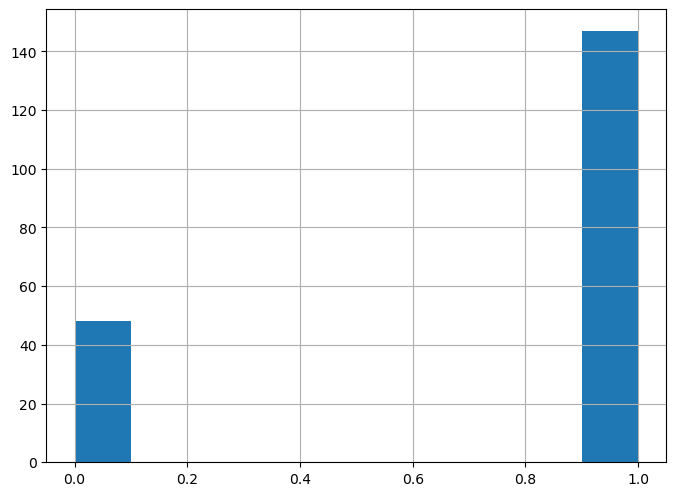

In [20]:
df.status.hist()

<AxesSubplot:>

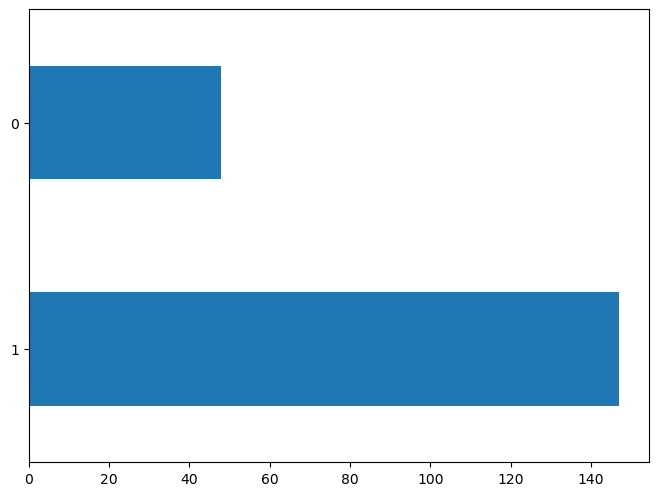

In [19]:
df.status.value_counts().plot(kind='barh')

<AxesSubplot:>

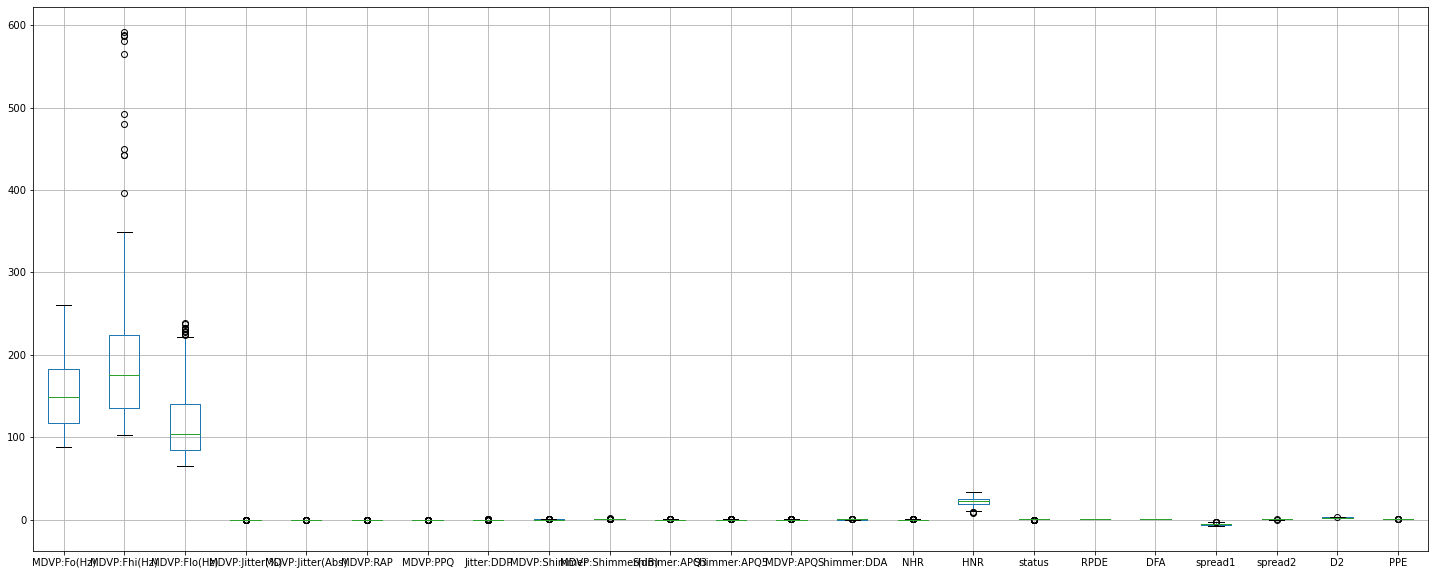

In [6]:
df.boxplot(figsize=(25,10))

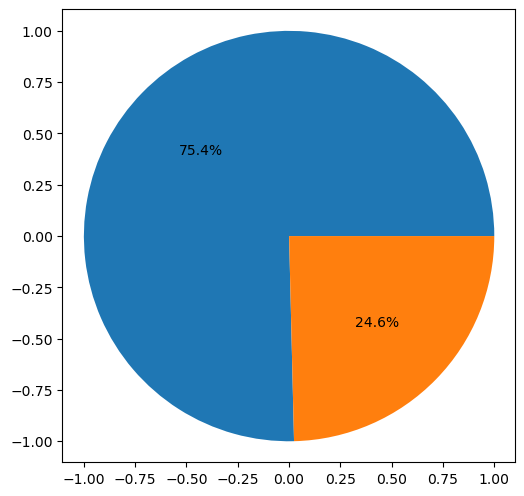

In [7]:
plt.rcParams['figure.figsize']=(8,6)
plt.rcParams['figure.dpi']=100

Pie=df['status'].value_counts()
plt.pie(Pie, autopct='%1.1f%%', frame=True)
plt.show() 


In [8]:
x = df.loc[:, df.columns != 'status'].values[:, 1:]
y = df.loc[:, 'status'].values

In [9]:
 #Feature Scalling

sc=StandardScaler()
x=sc.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=7)

In [10]:
#initialize model
ann=Sequential()

#add hidden layer
ann.add(Dense(units=150,activation='relu'))
ann.add(Dense(units=100,activation='relu'))
ann.add(Dense(units=75,activation='relu'))
ann.add(Dense(units=25,activation='relu'))

#Add output layer
ann.add(Dense(units=1,activation='sigmoid'))

#establish connection
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [11]:

#train the model
ann.fit(xtrain,ytrain,epochs=100, validation_split=0.3, batch_size=10)

Epoch 1/100
10/10 [==============================] - 3s 65ms/step - loss: 0.6232 - accuracy: 0.7053 - val_loss: 0.4824 - val_accuracy: 0.8780
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4524 - accuracy: 0.8316 - val_loss: 0.3563 - val_accuracy: 0.8537
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.3476 - accuracy: 0.8632 - val_loss: 0.3184 - val_accuracy: 0.8780
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 0.2906 - accuracy: 0.8737 - val_loss: 0.2779 - val_accuracy: 0.8537
Epoch 5/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2558 - accuracy: 0.9053 - val_loss: 0.3041 - val_accuracy: 0.8780
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.2057 - accuracy: 0.9158 - val_loss: 0.2600 - val_accuracy: 0.8537
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.1711 - accuracy: 0.9474 - val_loss: 0.2886 - val_accuracy: 0.8780
Epoch 

Epoch 58/100
10/10 [==============================] - 0s 10ms/step - loss: 2.5153e-04 - accuracy: 1.0000 - val_loss: 0.3978 - val_accuracy: 0.9268
Epoch 59/100
10/10 [==============================] - 0s 10ms/step - loss: 2.3624e-04 - accuracy: 1.0000 - val_loss: 0.4114 - val_accuracy: 0.9268
Epoch 60/100
10/10 [==============================] - 0s 9ms/step - loss: 2.2501e-04 - accuracy: 1.0000 - val_loss: 0.4124 - val_accuracy: 0.9268
Epoch 61/100
10/10 [==============================] - 0s 9ms/step - loss: 2.0720e-04 - accuracy: 1.0000 - val_loss: 0.4051 - val_accuracy: 0.9268
Epoch 62/100
10/10 [==============================] - 0s 9ms/step - loss: 2.0136e-04 - accuracy: 1.0000 - val_loss: 0.4077 - val_accuracy: 0.9268
Epoch 63/100
10/10 [==============================] - 0s 10ms/step - loss: 1.9377e-04 - accuracy: 1.0000 - val_loss: 0.4130 - val_accuracy: 0.9268
Epoch 64/100
10/10 [==============================] - 0s 12ms/step - loss: 1.7998e-04 - accuracy: 1.0000 - val_loss: 0.42

<AxesSubplot:>

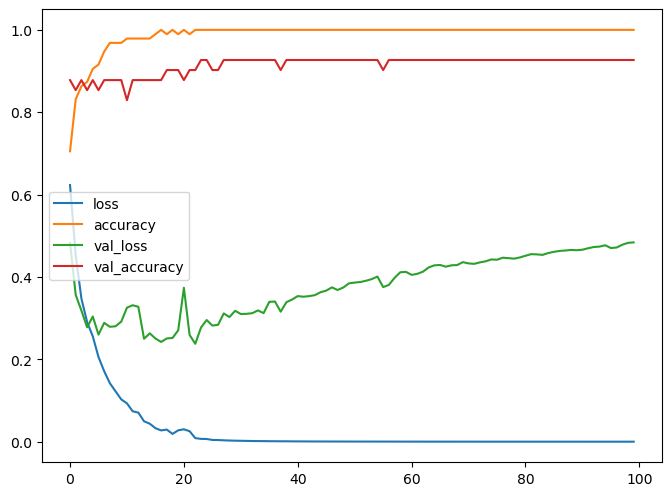

In [12]:
val_loss=pd.DataFrame(ann.history.history)
val_loss.plot()

In [13]:


ypred=ann.predict(xtest)
ypred=ypred>0.5

print(classification_report(ytest,ypred))

2/2 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.96      0.98      0.97        47

    accuracy                           0.95        59
   macro avg       0.93      0.91      0.92        59
weighted avg       0.95      0.95      0.95        59



<AxesSubplot:>

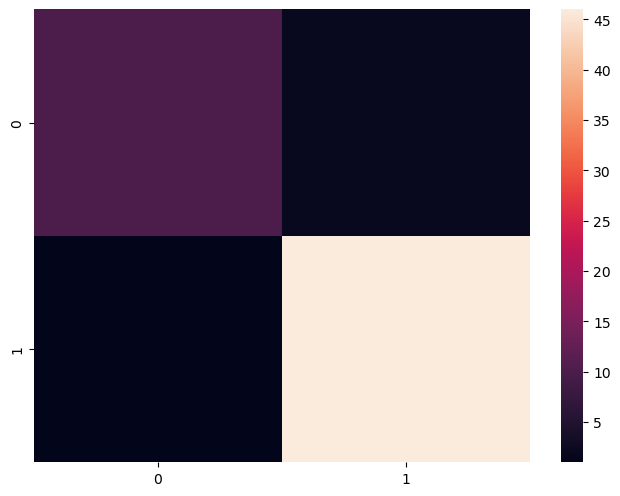

In [14]:
sns.heatmap(confusion_matrix(ytest,ypred))

#  Using Early Stopping And Drop Out Layer

In [15]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=10)

In [16]:
#add hidden layer
ann.add(Dense(units=15,activation='relu'))
ann.add(Dense(units=10,activation='relu'))

#add dropout
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=25,activation='relu'))

#Add output layer
ann.add(Dense(units=1,activation='sigmoid'))

#establish connection
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


#train the model and add call back
ann.fit(xtrain,ytrain,epochs=200,validation_data=(xtest,ytest),callbacks=[early])

Epoch 1/200
5/5 [==============================] - 4s 105ms/step - loss: 0.6779 - accuracy: 0.7500 - val_loss: 0.6652 - val_accuracy: 0.7966
Epoch 2/200
5/5 [==============================] - 0s 18ms/step - loss: 0.6600 - accuracy: 0.7353 - val_loss: 0.6462 - val_accuracy: 0.7966
Epoch 3/200
5/5 [==============================] - 0s 19ms/step - loss: 0.6372 - accuracy: 0.7353 - val_loss: 0.6257 - val_accuracy: 0.7966
Epoch 4/200
5/5 [==============================] - 0s 20ms/step - loss: 0.6231 - accuracy: 0.7353 - val_loss: 0.6030 - val_accuracy: 0.7966
Epoch 5/200
5/5 [==============================] - 0s 18ms/step - loss: 0.5968 - accuracy: 0.7353 - val_loss: 0.5770 - val_accuracy: 0.7966
Epoch 6/200
5/5 [==============================] - 0s 17ms/step - loss: 0.5704 - accuracy: 0.7353 - val_loss: 0.5518 - val_accuracy: 0.7966
Epoch 7/200
5/5 [==============================] - 0s 18ms/step - loss: 0.5447 - accuracy: 0.7353 - val_loss: 0.5261 - val_accuracy: 0.7966
Epoch 8/200
5/5 [==

<AxesSubplot:>

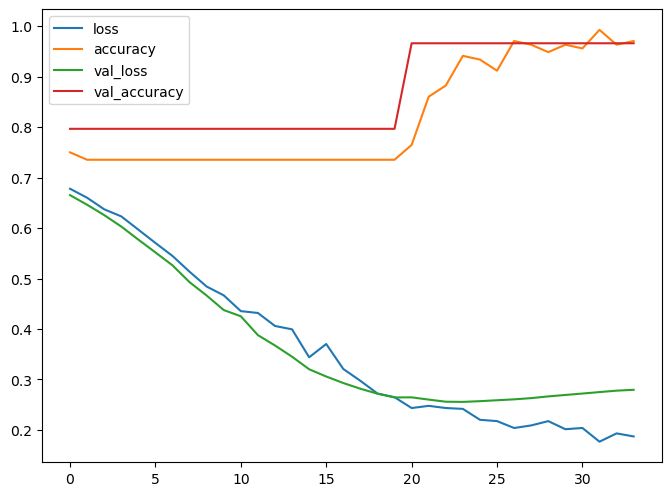

In [17]:
val_loss=pd.DataFrame(ann.history.history)
val_loss.plot()

In [18]:
ypred=ann.predict(xtest)
ypred=ypred>0.5

print(classification_report(ytest,ypred))

2/2 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.96      1.00      0.98        47

    accuracy                           0.97        59
   macro avg       0.98      0.92      0.94        59
weighted avg       0.97      0.97      0.96        59

